ECE 657 Q1

---


Hamza Mahdi

Note: This is not intended to be a report. Please check the assignment PDF.

In [9]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# load the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
# convert labels to one hot vectors 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
# randomly select 20% of training data
X_train_reduced, _, y_train_reduced, _ = train_test_split(x_train, y_train, test_size=0.8, random_state=42)

In [5]:
# normalize data
X_train_reduced = np.asarray(X_train_reduced)/255
x_test = np.asarray(x_test)/255

In [6]:
# split test set -> test/validation 50/50
X_test_reduced, X_validate_reduced, y_test_reduced, y_validate_reduced = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

Utility functions

In [7]:
# plots accuracy and loss of model over training epochs
def plot_acc(history, img_name):
  accuracy = history.history['categorical_accuracy']
  val_accuracy = history.history['val_categorical_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(accuracy)+1)
  plt.plot(epochs, accuracy, label='Training accuracy')
  plt.plot(epochs, val_accuracy, label='Validation accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.title(img_name)
  plt.savefig('accuracy_'+img_name+'.png')

  # loss history
  plt.figure()
  plt.plot(epochs, loss, label='Training loss')
  plt.plot(epochs, val_loss, label='Validation loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend()
  plt.title(img_name)
  plt.savefig('loss_'+img_name+'.png')
  plt.show()

# MLP

In [ ]:
n_samples = len(y_train_reduced)
n_features = 32*32
# data preparation
# flatten the images for input to MLP.
# Additionally, convert to grayscale for convenience (reduce the number of input nodes)
X_train_mlp = tf.image.rgb_to_grayscale(X_train_reduced).numpy().reshape((n_samples, 32*32))
X_validate_mlp = tf.image.rgb_to_grayscale(X_validate_reduced).numpy().reshape((len(y_validate_reduced), 32*32))
# transform test set to grayscale and reshape it
X_test_mlp = tf.image.rgb_to_grayscale(X_test_reduced).numpy().reshape((len(y_test_reduced), 32*32))

In [ ]:
X_train_mlp.shape

In [ ]:
# network structure
model = Sequential()
model.add(Dense(512, input_dim=n_features, activation='sigmoid'))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(10, activation='softmax')) # SOFTMAX BECAUSE SUM OF PROBABILITIES IS 1
# compile the model, specify the loss and optimizers 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
model.summary()


In [ ]:
# fit the model
history = model.fit(X_train_mlp, y_train_reduced, validation_data=(X_validate_mlp, y_validate_reduced), batch_size=32, epochs=5)


Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 2s 171us/step - loss: 2.1753 - categorical_accuracy: 0.2010 - val_loss: 2.0688 - val_categorical_accuracy: 0.2440
Epoch 2/5
10000/10000 [==============================] - 1s 147us/step - loss: 2.0466 - categorical_accuracy: 0.2553 - val_loss: 2.0141 - val_categorical_accuracy: 0.2798
Epoch 3/5
10000/10000 [==============================] - 1s 145us/step - loss: 1.9705 - categorical_accuracy: 0.2805 - val_loss: 1.9393 - val_categorical_accuracy: 0.2954
Epoch 4/5
10000/10000 [==============================] - 1s 141us/step - loss: 1.9093 - categorical_accuracy: 0.3082 - val_loss: 1.9431 - val_categorical_accuracy: 0.3106
Epoch 5/5
10000/10000 [==============================] - 1s 144us/step - loss: 1.8697 - categorical_accuracy: 0.3272 - val_loss: 1.9596 - val_categorical_accuracy: 0.3084


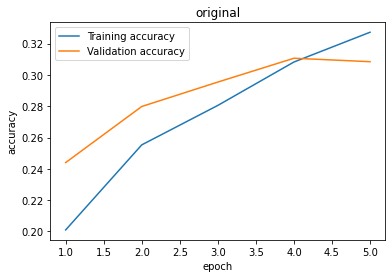

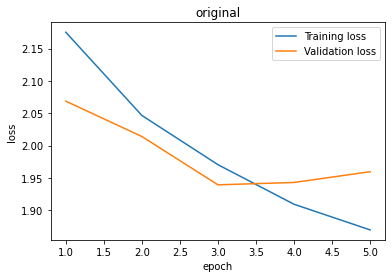

In [ ]:
plot_acc(history, 'original')

In [ ]:
# ONLY RUN IF YOU HAVE THE NOTEBOOK IN GOOGLE COLAB!!!
# this will save the images to local disk
from google.colab import files
files.download('accuracy_original.png')
files.download('loss_original.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
_, accuracy = model.evaluate(X_test_mlp, y_test_reduced)
print('The model accuracy on the test set is: ')
print(accuracy)

5000/5000 [==============================] - 0s 71us/step
The model accuracy on the test set is: 
0.3050000071525574


## Test various number of layers and number of neurons for MLP

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 1s 147us/step - loss: 2.1589 - categorical_accuracy: 0.2196 - val_loss: 2.1151 - val_categorical_accuracy: 0.2428
Epoch 2/5
10000/10000 [==============================] - 1s 131us/step - loss: 2.0504 - categorical_accuracy: 0.2653 - val_loss: 2.0338 - val_categorical_accuracy: 0.2822
Epoch 3/5
10000/10000 [==============================] - 1s 135us/step - loss: 2.0073 - categorical_accuracy: 0.2845 - val_loss: 1.9910 - val_categorical_accuracy: 0.2934
Epoch 4/5
10000/10000 [==============================] - 1s 131us/step - loss: 1.9667 - categorical_accuracy: 0.2967 - val_loss: 1.9712 - val_categorical_accuracy: 0.2978
Epoch 5/5
10000/10000 [==============================] - 1s 134us/step - loss: 1.9256 - categorical_accuracy: 0.3130 - val_loss: 1.9607 - val_categorical_accuracy: 0.3020


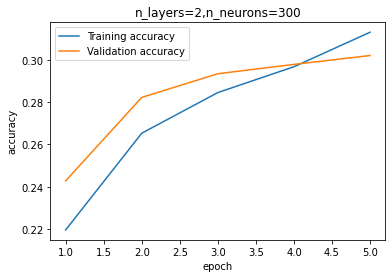

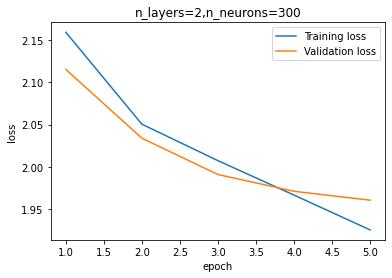

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 1s 143us/step - loss: 2.1638 - categorical_accuracy: 0.2154 - val_loss: 2.1116 - val_categorical_accuracy: 0.2182
Epoch 2/5
10000/10000 [==============================] - 1s 132us/step - loss: 2.0537 - categorical_accuracy: 0.2657 - val_loss: 2.0758 - val_categorical_accuracy: 0.2564
Epoch 3/5
10000/10000 [==============================] - 1s 131us/step - loss: 2.0079 - categorical_accuracy: 0.2849 - val_loss: 1.9988 - val_categorical_accuracy: 0.2830
Epoch 4/5
10000/10000 [==============================] - 1s 135us/step - loss: 1.9571 - categorical_accuracy: 0.3026 - val_loss: 2.0015 - val_categorical_accuracy: 0.2822
Epoch 5/5
10000/10000 [==============================] - 1s 135us/step - loss: 1.9091 - categorical_accuracy: 0.3214 - val_loss: 1.9215 - val_categorical_accuracy: 0.3222


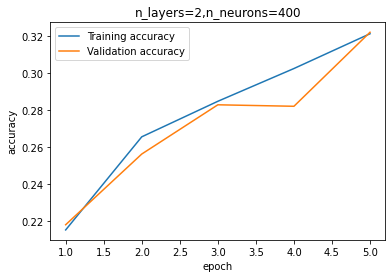

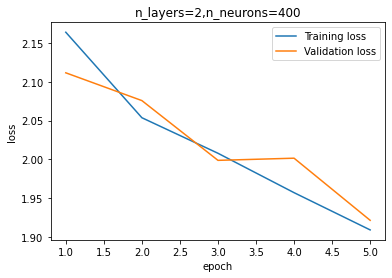

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 1s 138us/step - loss: 2.1681 - categorical_accuracy: 0.2115 - val_loss: 2.0880 - val_categorical_accuracy: 0.2466
Epoch 2/5
10000/10000 [==============================] - 1s 132us/step - loss: 2.0585 - categorical_accuracy: 0.2661 - val_loss: 2.0496 - val_categorical_accuracy: 0.2640
Epoch 3/5
10000/10000 [==============================] - 1s 134us/step - loss: 2.0004 - categorical_accuracy: 0.2912 - val_loss: 1.9895 - val_categorical_accuracy: 0.2958
Epoch 4/5
10000/10000 [==============================] - 1s 132us/step - loss: 1.9480 - categorical_accuracy: 0.3058 - val_loss: 1.9669 - val_categorical_accuracy: 0.2988
Epoch 5/5
10000/10000 [==============================] - 1s 133us/step - loss: 1.9063 - categorical_accuracy: 0.3194 - val_loss: 1.9309 - val_categorical_accuracy: 0.3182


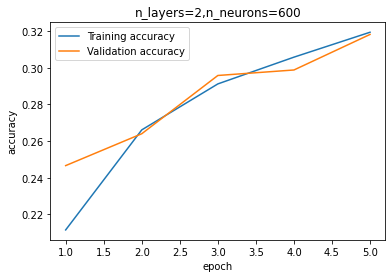

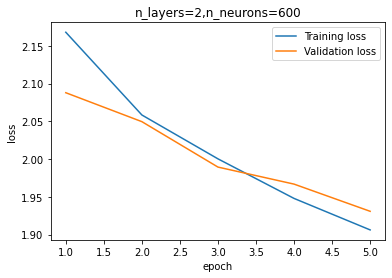

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 1s 144us/step - loss: 2.1685 - categorical_accuracy: 0.2164 - val_loss: 2.1030 - val_categorical_accuracy: 0.2390
Epoch 2/5
10000/10000 [==============================] - 1s 134us/step - loss: 2.0574 - categorical_accuracy: 0.2666 - val_loss: 2.1132 - val_categorical_accuracy: 0.2610
Epoch 3/5
10000/10000 [==============================] - 1s 132us/step - loss: 2.0062 - categorical_accuracy: 0.2846 - val_loss: 2.0212 - val_categorical_accuracy: 0.2612
Epoch 4/5
10000/10000 [==============================] - 1s 135us/step - loss: 1.9493 - categorical_accuracy: 0.3096 - val_loss: 2.0020 - val_categorical_accuracy: 0.2694
Epoch 5/5
10000/10000 [==============================] - 1s 131us/step - loss: 1.9077 - categorical_accuracy: 0.3140 - val_loss: 1.9415 - val_categorical_accuracy: 0.3038


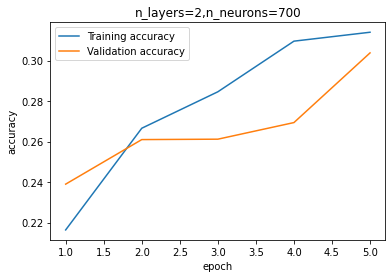

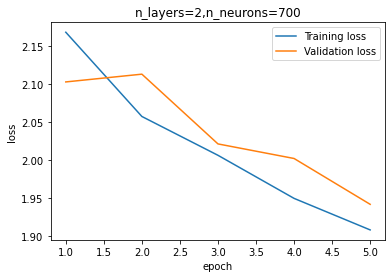

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 1s 141us/step - loss: 2.1787 - categorical_accuracy: 0.2181 - val_loss: 2.1039 - val_categorical_accuracy: 0.2318
Epoch 2/5
10000/10000 [==============================] - 1s 134us/step - loss: 2.0562 - categorical_accuracy: 0.2675 - val_loss: 2.0300 - val_categorical_accuracy: 0.2826
Epoch 3/5
10000/10000 [==============================] - 1s 135us/step - loss: 2.0126 - categorical_accuracy: 0.2762 - val_loss: 2.0115 - val_categorical_accuracy: 0.2604
Epoch 4/5
10000/10000 [==============================] - 1s 135us/step - loss: 1.9631 - categorical_accuracy: 0.2960 - val_loss: 1.9741 - val_categorical_accuracy: 0.2780
Epoch 5/5
10000/10000 [==============================] - 1s 135us/step - loss: 1.9065 - categorical_accuracy: 0.3202 - val_loss: 1.9293 - val_categorical_accuracy: 0.3142


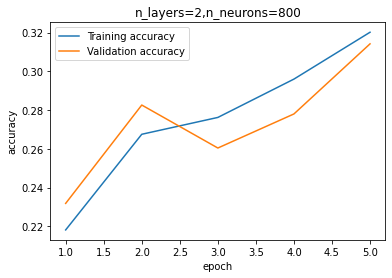

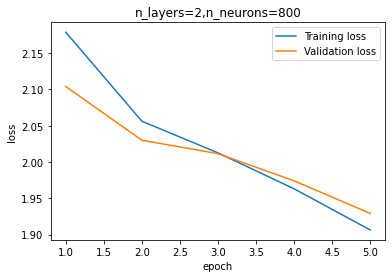

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 1s 141us/step - loss: 2.1942 - categorical_accuracy: 0.2106 - val_loss: 2.1376 - val_categorical_accuracy: 0.2260
Epoch 2/5
10000/10000 [==============================] - 1s 133us/step - loss: 2.0707 - categorical_accuracy: 0.2604 - val_loss: 2.0897 - val_categorical_accuracy: 0.2794
Epoch 3/5
10000/10000 [==============================] - 1s 135us/step - loss: 2.0121 - categorical_accuracy: 0.2761 - val_loss: 2.0371 - val_categorical_accuracy: 0.2740
Epoch 4/5
10000/10000 [==============================] - 1s 135us/step - loss: 1.9612 - categorical_accuracy: 0.2958 - val_loss: 1.9461 - val_categorical_accuracy: 0.3134
Epoch 5/5
10000/10000 [==============================] - 1s 133us/step - loss: 1.9142 - categorical_accuracy: 0.3122 - val_loss: 1.9557 - val_categorical_accuracy: 0.3036


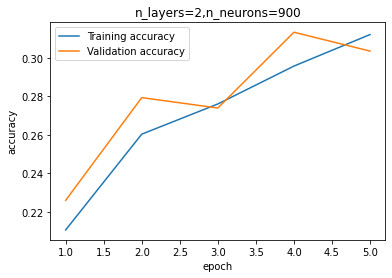

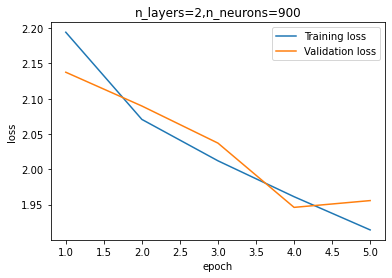

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 1s 141us/step - loss: 2.1830 - categorical_accuracy: 0.2186 - val_loss: 2.1218 - val_categorical_accuracy: 0.2334
Epoch 2/5
10000/10000 [==============================] - 1s 132us/step - loss: 2.0657 - categorical_accuracy: 0.2574 - val_loss: 2.0461 - val_categorical_accuracy: 0.2702
Epoch 3/5
10000/10000 [==============================] - 1s 134us/step - loss: 2.0017 - categorical_accuracy: 0.2844 - val_loss: 1.9715 - val_categorical_accuracy: 0.2898
Epoch 4/5
10000/10000 [==============================] - 1s 134us/step - loss: 1.9529 - categorical_accuracy: 0.3007 - val_loss: 1.9737 - val_categorical_accuracy: 0.3000
Epoch 5/5
10000/10000 [==============================] - 1s 136us/step - loss: 1.9065 - categorical_accuracy: 0.3181 - val_loss: 1.9525 - val_categorical_accuracy: 0.3054


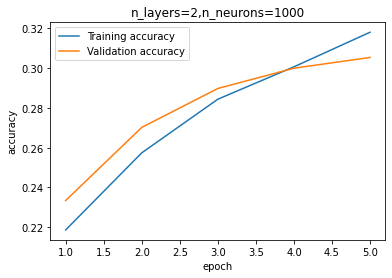

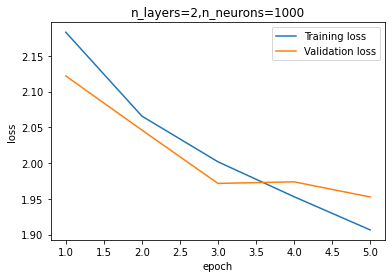

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 2s 157us/step - loss: 2.1716 - categorical_accuracy: 0.1944 - val_loss: 2.0800 - val_categorical_accuracy: 0.2468
Epoch 2/5
10000/10000 [==============================] - 1s 145us/step - loss: 2.0527 - categorical_accuracy: 0.2588 - val_loss: 2.0187 - val_categorical_accuracy: 0.2698
Epoch 3/5
10000/10000 [==============================] - 1s 143us/step - loss: 1.9862 - categorical_accuracy: 0.2791 - val_loss: 1.9523 - val_categorical_accuracy: 0.3152
Epoch 4/5
10000/10000 [==============================] - 1s 144us/step - loss: 1.9247 - categorical_accuracy: 0.3086 - val_loss: 1.9296 - val_categorical_accuracy: 0.3084
Epoch 5/5
10000/10000 [==============================] - 1s 144us/step - loss: 1.8805 - categorical_accuracy: 0.3244 - val_loss: 1.9071 - val_categorical_accuracy: 0.3148


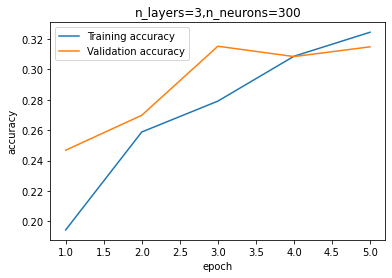

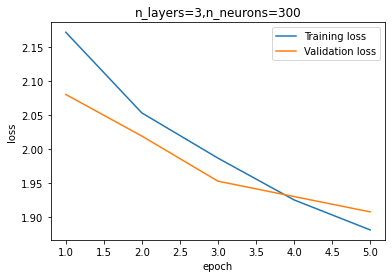

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 2s 153us/step - loss: 2.1824 - categorical_accuracy: 0.1968 - val_loss: 2.1036 - val_categorical_accuracy: 0.2110
Epoch 2/5
10000/10000 [==============================] - 1s 144us/step - loss: 2.0501 - categorical_accuracy: 0.2542 - val_loss: 2.0133 - val_categorical_accuracy: 0.2676
Epoch 3/5
10000/10000 [==============================] - 1s 144us/step - loss: 1.9886 - categorical_accuracy: 0.2807 - val_loss: 1.9477 - val_categorical_accuracy: 0.2902
Epoch 4/5
10000/10000 [==============================] - 1s 144us/step - loss: 1.9273 - categorical_accuracy: 0.2988 - val_loss: 1.9434 - val_categorical_accuracy: 0.3106
Epoch 5/5
10000/10000 [==============================] - 1s 146us/step - loss: 1.8795 - categorical_accuracy: 0.3149 - val_loss: 1.9631 - val_categorical_accuracy: 0.2670


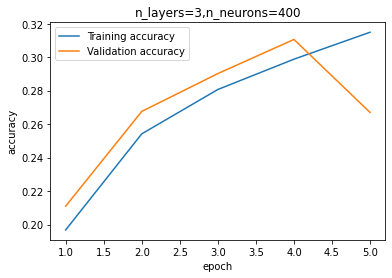

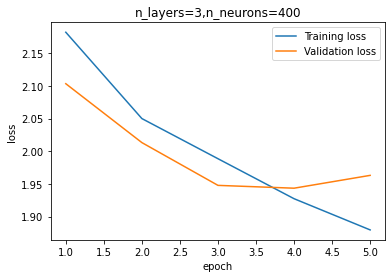

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 2s 154us/step - loss: 2.1747 - categorical_accuracy: 0.2039 - val_loss: 2.1097 - val_categorical_accuracy: 0.2266
Epoch 2/5
10000/10000 [==============================] - 1s 146us/step - loss: 2.0442 - categorical_accuracy: 0.2574 - val_loss: 2.0764 - val_categorical_accuracy: 0.2578
Epoch 3/5
10000/10000 [==============================] - 1s 148us/step - loss: 1.9828 - categorical_accuracy: 0.2796 - val_loss: 1.9962 - val_categorical_accuracy: 0.2652
Epoch 4/5
10000/10000 [==============================] - 1s 143us/step - loss: 1.9046 - categorical_accuracy: 0.3138 - val_loss: 1.9113 - val_categorical_accuracy: 0.3052
Epoch 5/5
10000/10000 [==============================] - 1s 142us/step - loss: 1.8639 - categorical_accuracy: 0.3313 - val_loss: 1.9360 - val_categorical_accuracy: 0.3054


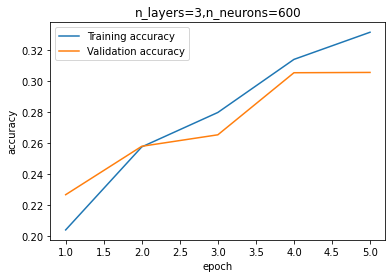

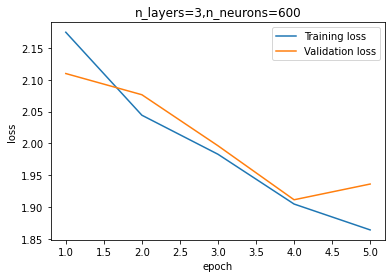

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 2s 156us/step - loss: 2.1972 - categorical_accuracy: 0.1912 - val_loss: 2.1018 - val_categorical_accuracy: 0.2196
Epoch 2/5
10000/10000 [==============================] - 1s 144us/step - loss: 2.0525 - categorical_accuracy: 0.2578 - val_loss: 2.0195 - val_categorical_accuracy: 0.2642
Epoch 3/5
10000/10000 [==============================] - 1s 147us/step - loss: 1.9768 - categorical_accuracy: 0.2839 - val_loss: 1.9793 - val_categorical_accuracy: 0.2774
Epoch 4/5
10000/10000 [==============================] - 1s 145us/step - loss: 1.9148 - categorical_accuracy: 0.3026 - val_loss: 1.9082 - val_categorical_accuracy: 0.3256
Epoch 5/5
10000/10000 [==============================] - 1s 143us/step - loss: 1.8673 - categorical_accuracy: 0.3232 - val_loss: 1.9573 - val_categorical_accuracy: 0.3138


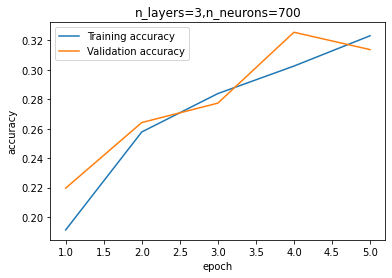

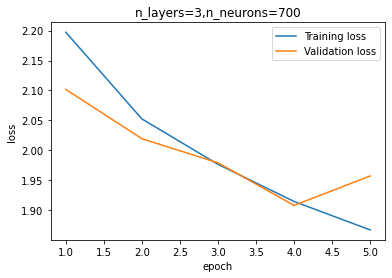

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 2s 155us/step - loss: 2.1957 - categorical_accuracy: 0.1986 - val_loss: 2.0825 - val_categorical_accuracy: 0.2628
Epoch 2/5
10000/10000 [==============================] - 1s 144us/step - loss: 2.0616 - categorical_accuracy: 0.2540 - val_loss: 2.0947 - val_categorical_accuracy: 0.2702
Epoch 3/5
10000/10000 [==============================] - 1s 145us/step - loss: 1.9944 - categorical_accuracy: 0.2752 - val_loss: 1.9538 - val_categorical_accuracy: 0.2956
Epoch 4/5
10000/10000 [==============================] - 1s 145us/step - loss: 1.9246 - categorical_accuracy: 0.2964 - val_loss: 1.9573 - val_categorical_accuracy: 0.3070
Epoch 5/5
10000/10000 [==============================] - 1s 146us/step - loss: 1.8748 - categorical_accuracy: 0.3253 - val_loss: 1.8974 - val_categorical_accuracy: 0.3128


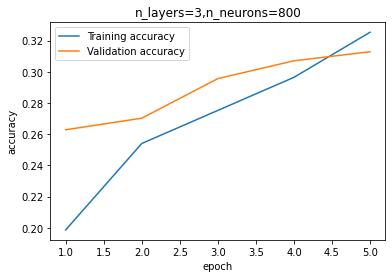

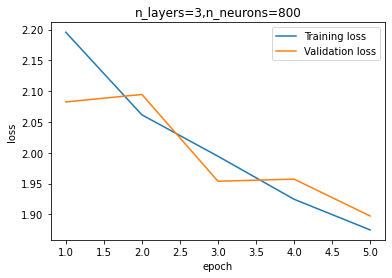

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 2s 162us/step - loss: 2.2130 - categorical_accuracy: 0.1846 - val_loss: 2.0919 - val_categorical_accuracy: 0.2368
Epoch 2/5
10000/10000 [==============================] - 1s 145us/step - loss: 2.0589 - categorical_accuracy: 0.2532 - val_loss: 2.0075 - val_categorical_accuracy: 0.2816
Epoch 3/5
10000/10000 [==============================] - 1s 146us/step - loss: 1.9731 - categorical_accuracy: 0.2862 - val_loss: 1.9495 - val_categorical_accuracy: 0.3050
Epoch 4/5
10000/10000 [==============================] - 1s 147us/step - loss: 1.9189 - categorical_accuracy: 0.3079 - val_loss: 1.9192 - val_categorical_accuracy: 0.3020
Epoch 5/5
10000/10000 [==============================] - 1s 147us/step - loss: 1.8775 - categorical_accuracy: 0.3202 - val_loss: 1.8689 - val_categorical_accuracy: 0.3292


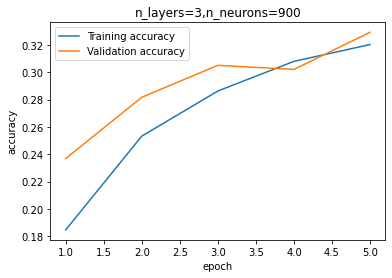

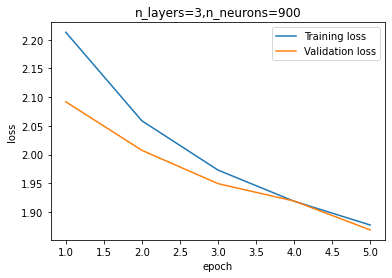

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 2s 156us/step - loss: 2.2119 - categorical_accuracy: 0.1938 - val_loss: 2.0852 - val_categorical_accuracy: 0.2332
Epoch 2/5
10000/10000 [==============================] - 1s 150us/step - loss: 2.0584 - categorical_accuracy: 0.2538 - val_loss: 1.9961 - val_categorical_accuracy: 0.2684
Epoch 3/5
10000/10000 [==============================] - 1s 149us/step - loss: 1.9783 - categorical_accuracy: 0.2750 - val_loss: 1.9488 - val_categorical_accuracy: 0.2980
Epoch 4/5
10000/10000 [==============================] - 1s 149us/step - loss: 1.9257 - categorical_accuracy: 0.3016 - val_loss: 1.9693 - val_categorical_accuracy: 0.3104
Epoch 5/5
10000/10000 [==============================] - 1s 147us/step - loss: 1.8738 - categorical_accuracy: 0.3276 - val_loss: 1.9202 - val_categorical_accuracy: 0.3086


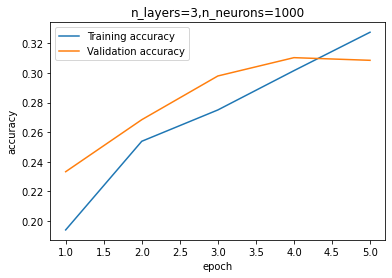

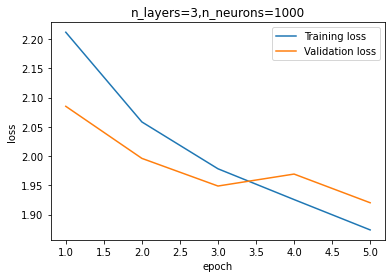

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 2s 165us/step - loss: 2.2165 - categorical_accuracy: 0.1635 - val_loss: 2.1008 - val_categorical_accuracy: 0.2220
Epoch 2/5
10000/10000 [==============================] - 2s 152us/step - loss: 2.0850 - categorical_accuracy: 0.2358 - val_loss: 2.0763 - val_categorical_accuracy: 0.2308
Epoch 3/5
10000/10000 [==============================] - 2s 154us/step - loss: 2.0241 - categorical_accuracy: 0.2627 - val_loss: 2.0227 - val_categorical_accuracy: 0.2760
Epoch 4/5
10000/10000 [==============================] - 2s 151us/step - loss: 1.9780 - categorical_accuracy: 0.2849 - val_loss: 1.9451 - val_categorical_accuracy: 0.2854
Epoch 5/5
10000/10000 [==============================] - 2s 152us/step - loss: 1.9312 - categorical_accuracy: 0.3022 - val_loss: 1.9580 - val_categorical_accuracy: 0.3008


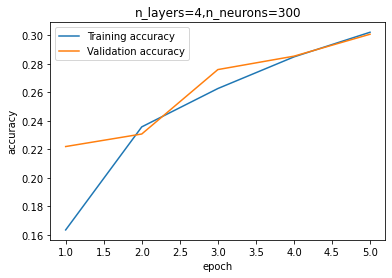

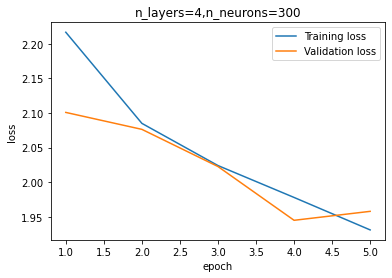

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 2s 167us/step - loss: 2.2268 - categorical_accuracy: 0.1632 - val_loss: 2.0947 - val_categorical_accuracy: 0.2138
Epoch 2/5
10000/10000 [==============================] - 2s 154us/step - loss: 2.0709 - categorical_accuracy: 0.2401 - val_loss: 2.0518 - val_categorical_accuracy: 0.2612
Epoch 3/5
10000/10000 [==============================] - 2s 154us/step - loss: 2.0245 - categorical_accuracy: 0.2606 - val_loss: 1.9955 - val_categorical_accuracy: 0.2820
Epoch 4/5
10000/10000 [==============================] - 2s 154us/step - loss: 1.9734 - categorical_accuracy: 0.2863 - val_loss: 1.9445 - val_categorical_accuracy: 0.3026
Epoch 5/5
10000/10000 [==============================] - 2s 153us/step - loss: 1.9236 - categorical_accuracy: 0.2987 - val_loss: 1.9296 - val_categorical_accuracy: 0.3056


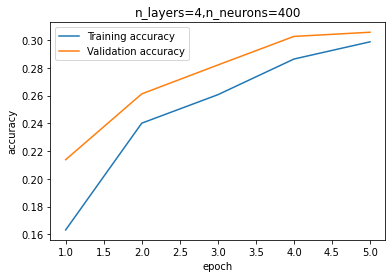

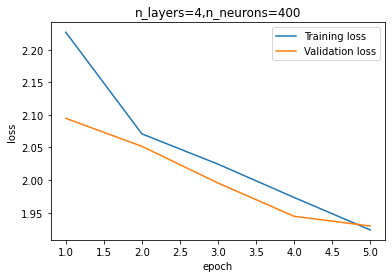

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 2s 171us/step - loss: 2.2236 - categorical_accuracy: 0.1647 - val_loss: 2.0815 - val_categorical_accuracy: 0.2264
Epoch 2/5
10000/10000 [==============================] - 2s 156us/step - loss: 2.0676 - categorical_accuracy: 0.2482 - val_loss: 2.0797 - val_categorical_accuracy: 0.2364
Epoch 3/5
10000/10000 [==============================] - 2s 155us/step - loss: 2.0154 - categorical_accuracy: 0.2648 - val_loss: 1.9548 - val_categorical_accuracy: 0.3072
Epoch 4/5
10000/10000 [==============================] - 2s 155us/step - loss: 1.9567 - categorical_accuracy: 0.2980 - val_loss: 1.9556 - val_categorical_accuracy: 0.2872
Epoch 5/5
10000/10000 [==============================] - 2s 155us/step - loss: 1.9138 - categorical_accuracy: 0.3101 - val_loss: 1.9010 - val_categorical_accuracy: 0.3296


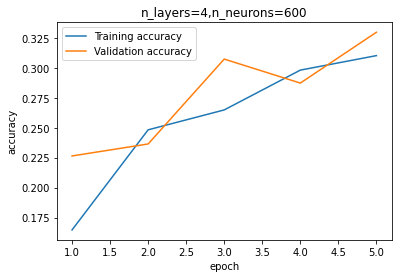

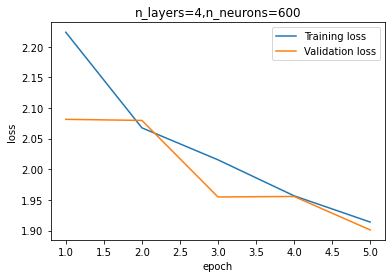

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 2s 167us/step - loss: 2.2494 - categorical_accuracy: 0.1594 - val_loss: 2.1132 - val_categorical_accuracy: 0.2146
Epoch 2/5
10000/10000 [==============================] - 2s 155us/step - loss: 2.0801 - categorical_accuracy: 0.2436 - val_loss: 2.0123 - val_categorical_accuracy: 0.2740
Epoch 3/5
10000/10000 [==============================] - 2s 155us/step - loss: 2.0125 - categorical_accuracy: 0.2761 - val_loss: 1.9905 - val_categorical_accuracy: 0.2930
Epoch 4/5
10000/10000 [==============================] - 2s 154us/step - loss: 1.9571 - categorical_accuracy: 0.2917 - val_loss: 1.9525 - val_categorical_accuracy: 0.2938
Epoch 5/5
10000/10000 [==============================] - 2s 157us/step - loss: 1.9157 - categorical_accuracy: 0.3097 - val_loss: 1.9096 - val_categorical_accuracy: 0.3200


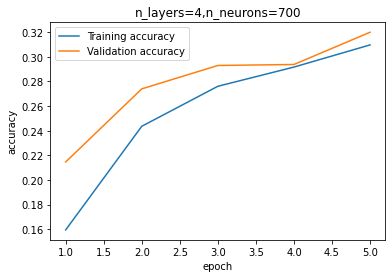

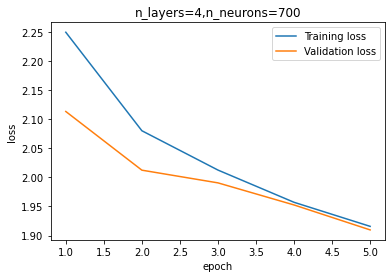

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 2s 173us/step - loss: 2.2774 - categorical_accuracy: 0.1438 - val_loss: 2.1394 - val_categorical_accuracy: 0.2096
Epoch 2/5
10000/10000 [==============================] - 2s 163us/step - loss: 2.1080 - categorical_accuracy: 0.2238 - val_loss: 2.1062 - val_categorical_accuracy: 0.2262
Epoch 3/5
10000/10000 [==============================] - 2s 154us/step - loss: 2.0434 - categorical_accuracy: 0.2539 - val_loss: 2.0083 - val_categorical_accuracy: 0.2610
Epoch 4/5
10000/10000 [==============================] - 2s 161us/step - loss: 1.9771 - categorical_accuracy: 0.2881 - val_loss: 2.0022 - val_categorical_accuracy: 0.2676
Epoch 5/5
10000/10000 [==============================] - 2s 157us/step - loss: 1.9392 - categorical_accuracy: 0.3025 - val_loss: 1.9369 - val_categorical_accuracy: 0.2954


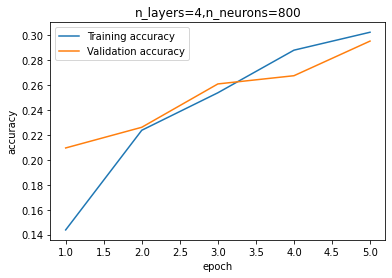

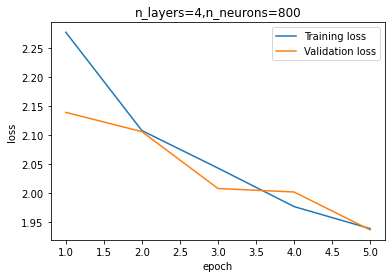

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 2s 176us/step - loss: 2.2994 - categorical_accuracy: 0.1318 - val_loss: 2.2295 - val_categorical_accuracy: 0.1674
Epoch 2/5
10000/10000 [==============================] - 2s 163us/step - loss: 2.1414 - categorical_accuracy: 0.2072 - val_loss: 2.1221 - val_categorical_accuracy: 0.2292
Epoch 3/5
10000/10000 [==============================] - 2s 160us/step - loss: 2.0527 - categorical_accuracy: 0.2463 - val_loss: 1.9905 - val_categorical_accuracy: 0.2842
Epoch 4/5
10000/10000 [==============================] - 2s 162us/step - loss: 1.9953 - categorical_accuracy: 0.2796 - val_loss: 2.0567 - val_categorical_accuracy: 0.2576
Epoch 5/5
10000/10000 [==============================] - 2s 158us/step - loss: 1.9566 - categorical_accuracy: 0.2935 - val_loss: 1.9926 - val_categorical_accuracy: 0.2906


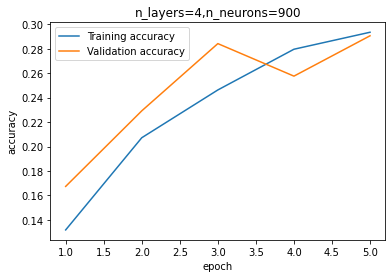

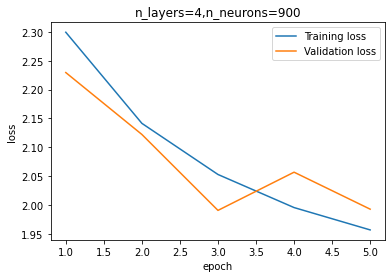

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 2s 180us/step - loss: 2.2639 - categorical_accuracy: 0.1528 - val_loss: 2.1467 - val_categorical_accuracy: 0.2020
Epoch 2/5
10000/10000 [==============================] - 2s 167us/step - loss: 2.1146 - categorical_accuracy: 0.2261 - val_loss: 2.1251 - val_categorical_accuracy: 0.2088
Epoch 3/5
10000/10000 [==============================] - 2s 166us/step - loss: 2.0479 - categorical_accuracy: 0.2559 - val_loss: 1.9954 - val_categorical_accuracy: 0.2740
Epoch 4/5
10000/10000 [==============================] - 2s 164us/step - loss: 1.9932 - categorical_accuracy: 0.2795 - val_loss: 1.9441 - val_categorical_accuracy: 0.3042
Epoch 5/5
10000/10000 [==============================] - 2s 168us/step - loss: 1.9430 - categorical_accuracy: 0.2941 - val_loss: 2.0137 - val_categorical_accuracy: 0.2834


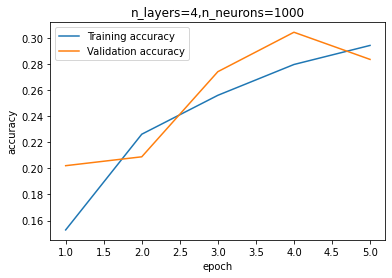

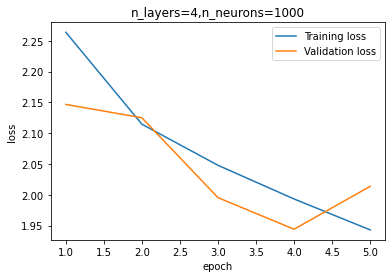

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 2s 190us/step - loss: 2.2454 - categorical_accuracy: 0.1386 - val_loss: 2.1795 - val_categorical_accuracy: 0.1872
Epoch 2/5
10000/10000 [==============================] - 2s 176us/step - loss: 2.1243 - categorical_accuracy: 0.2096 - val_loss: 2.1105 - val_categorical_accuracy: 0.2092
Epoch 3/5
10000/10000 [==============================] - 2s 177us/step - loss: 2.0652 - categorical_accuracy: 0.2315 - val_loss: 2.0158 - val_categorical_accuracy: 0.2630
Epoch 4/5
10000/10000 [==============================] - 2s 166us/step - loss: 2.0146 - categorical_accuracy: 0.2609 - val_loss: 2.0686 - val_categorical_accuracy: 0.2408
Epoch 5/5
10000/10000 [==============================] - 2s 163us/step - loss: 1.9833 - categorical_accuracy: 0.2745 - val_loss: 1.9834 - val_categorical_accuracy: 0.2776


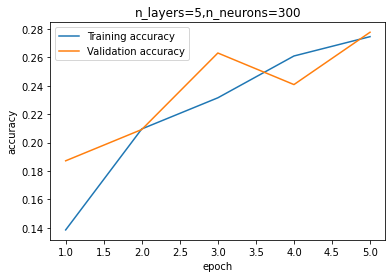

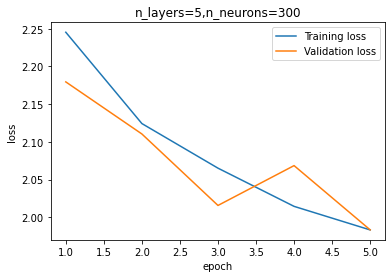

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 2s 179us/step - loss: 2.2543 - categorical_accuracy: 0.1400 - val_loss: 2.1716 - val_categorical_accuracy: 0.1746
Epoch 2/5
10000/10000 [==============================] - 2s 164us/step - loss: 2.1237 - categorical_accuracy: 0.2126 - val_loss: 2.0975 - val_categorical_accuracy: 0.2312
Epoch 3/5
10000/10000 [==============================] - 2s 161us/step - loss: 2.0640 - categorical_accuracy: 0.2354 - val_loss: 2.0324 - val_categorical_accuracy: 0.2570
Epoch 4/5
10000/10000 [==============================] - 2s 165us/step - loss: 2.0051 - categorical_accuracy: 0.2654 - val_loss: 2.0239 - val_categorical_accuracy: 0.2576
Epoch 5/5
10000/10000 [==============================] - 2s 163us/step - loss: 1.9608 - categorical_accuracy: 0.2855 - val_loss: 1.9614 - val_categorical_accuracy: 0.2864


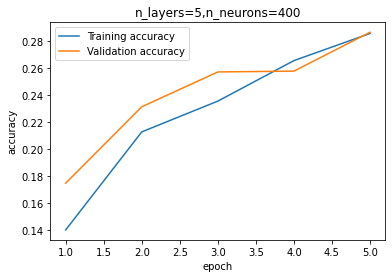

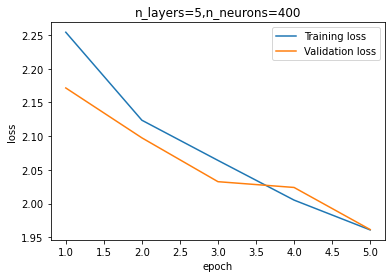

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 2s 177us/step - loss: 2.2958 - categorical_accuracy: 0.1290 - val_loss: 2.2162 - val_categorical_accuracy: 0.1450
Epoch 2/5
10000/10000 [==============================] - 2s 164us/step - loss: 2.2037 - categorical_accuracy: 0.1576 - val_loss: 2.1758 - val_categorical_accuracy: 0.1702
Epoch 3/5
10000/10000 [==============================] - 2s 164us/step - loss: 2.1202 - categorical_accuracy: 0.2111 - val_loss: 2.1087 - val_categorical_accuracy: 0.1928
Epoch 4/5
10000/10000 [==============================] - 2s 160us/step - loss: 2.0462 - categorical_accuracy: 0.2428 - val_loss: 2.0890 - val_categorical_accuracy: 0.2276
Epoch 5/5
10000/10000 [==============================] - 2s 164us/step - loss: 2.0036 - categorical_accuracy: 0.2649 - val_loss: 2.0224 - val_categorical_accuracy: 0.2716


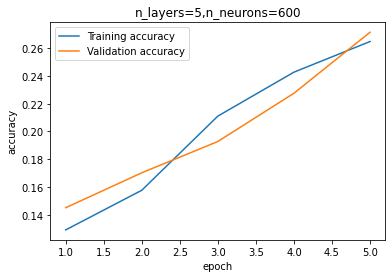

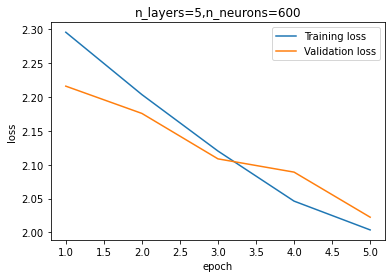

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 2s 185us/step - loss: 2.2855 - categorical_accuracy: 0.1297 - val_loss: 2.1958 - val_categorical_accuracy: 0.1494
Epoch 2/5
10000/10000 [==============================] - 2s 168us/step - loss: 2.1933 - categorical_accuracy: 0.1769 - val_loss: 2.1705 - val_categorical_accuracy: 0.1754
Epoch 3/5
10000/10000 [==============================] - 2s 168us/step - loss: 2.1207 - categorical_accuracy: 0.2095 - val_loss: 2.0851 - val_categorical_accuracy: 0.2382
Epoch 4/5
10000/10000 [==============================] - 2s 167us/step - loss: 2.0654 - categorical_accuracy: 0.2384 - val_loss: 2.0459 - val_categorical_accuracy: 0.2290
Epoch 5/5
10000/10000 [==============================] - 2s 168us/step - loss: 2.0148 - categorical_accuracy: 0.2622 - val_loss: 2.0114 - val_categorical_accuracy: 0.2758


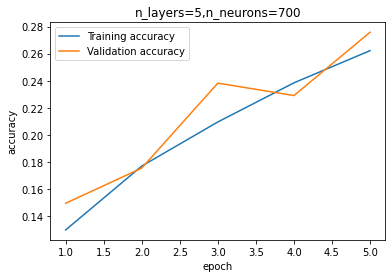

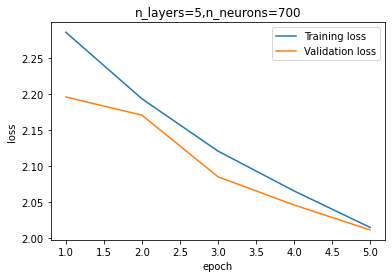

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 2s 187us/step - loss: 2.3021 - categorical_accuracy: 0.1294 - val_loss: 2.1671 - val_categorical_accuracy: 0.1644
Epoch 2/5
10000/10000 [==============================] - 2s 171us/step - loss: 2.1452 - categorical_accuracy: 0.1979 - val_loss: 2.1180 - val_categorical_accuracy: 0.2056
Epoch 3/5
10000/10000 [==============================] - 2s 171us/step - loss: 2.0771 - categorical_accuracy: 0.2345 - val_loss: 2.1242 - val_categorical_accuracy: 0.2278
Epoch 4/5
10000/10000 [==============================] - 2s 172us/step - loss: 2.0209 - categorical_accuracy: 0.2520 - val_loss: 2.0077 - val_categorical_accuracy: 0.2594
Epoch 5/5
10000/10000 [==============================] - 2s 170us/step - loss: 1.9883 - categorical_accuracy: 0.2676 - val_loss: 2.0259 - val_categorical_accuracy: 0.2708


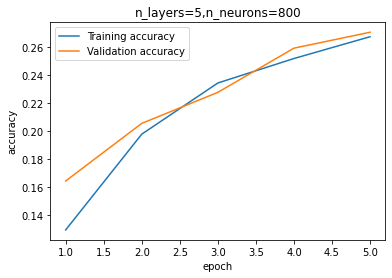

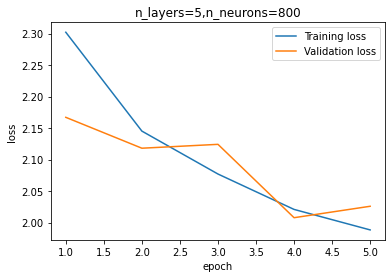

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 2s 191us/step - loss: 2.3263 - categorical_accuracy: 0.1194 - val_loss: 2.2546 - val_categorical_accuracy: 0.1024
Epoch 2/5
10000/10000 [==============================] - 2s 177us/step - loss: 2.2213 - categorical_accuracy: 0.1641 - val_loss: 2.1914 - val_categorical_accuracy: 0.1572
Epoch 3/5
10000/10000 [==============================] - 2s 177us/step - loss: 2.1377 - categorical_accuracy: 0.1971 - val_loss: 2.0774 - val_categorical_accuracy: 0.2258
Epoch 4/5
10000/10000 [==============================] - 2s 176us/step - loss: 2.0548 - categorical_accuracy: 0.2338 - val_loss: 2.0406 - val_categorical_accuracy: 0.2506
Epoch 5/5
10000/10000 [==============================] - 2s 177us/step - loss: 2.0204 - categorical_accuracy: 0.2515 - val_loss: 2.0513 - val_categorical_accuracy: 0.2584


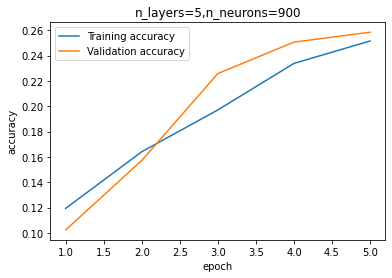

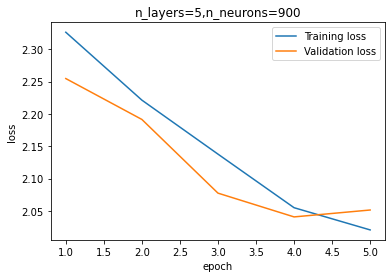

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 2s 194us/step - loss: 2.3333 - categorical_accuracy: 0.1122 - val_loss: 2.2157 - val_categorical_accuracy: 0.1578
Epoch 2/5
10000/10000 [==============================] - 2s 180us/step - loss: 2.1854 - categorical_accuracy: 0.1815 - val_loss: 2.1556 - val_categorical_accuracy: 0.1748
Epoch 3/5
10000/10000 [==============================] - 2s 179us/step - loss: 2.0974 - categorical_accuracy: 0.2201 - val_loss: 2.1045 - val_categorical_accuracy: 0.2138
Epoch 4/5
10000/10000 [==============================] - 2s 183us/step - loss: 2.0466 - categorical_accuracy: 0.2468 - val_loss: 2.0120 - val_categorical_accuracy: 0.2538
Epoch 5/5
10000/10000 [==============================] - 2s 182us/step - loss: 2.0053 - categorical_accuracy: 0.2591 - val_loss: 2.0749 - val_categorical_accuracy: 0.2338


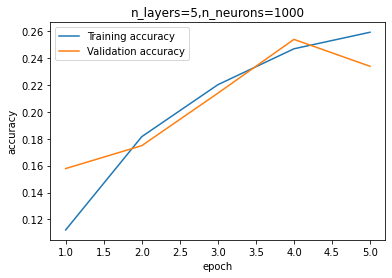

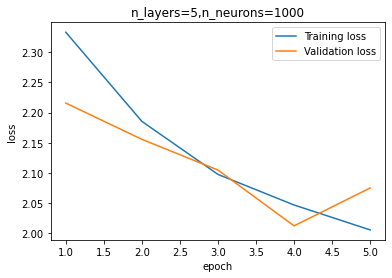

In [ ]:
n_layers = [2, 3, 4, 5]
n_neurons = [300, 400, 600, 700, 800, 900, 1000]
for n_layer in n_layers:
  for n_neuron in n_neurons:
    # network structure
    model = Sequential()
    model.add(Dense(n_neuron, input_dim=n_features, activation='sigmoid'))
    # add more layers
    for i in range(n_layer-2):
      model.add(Dense(n_neuron, activation='sigmoid'))
    model.add(Dense(10, activation='softmax')) # SOFTMAX BECAUSE SUM OF PROBABILITIES IS 1
    # compile the model, specify the loss and optimizers and fit the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
    history = model.fit(X_train_mlp, y_train_reduced, validation_data=(X_validate_mlp, y_validate_reduced), batch_size=32, epochs=5)
    plot_acc(history, 'n_layers='+str(n_layer)+',n_neurons='+str(n_neuron))

In [ ]:
# ONLY RUN IF YOU HAVE THE NOTEBOOK IN GOOGLE COLAB!!!
# this will save the images to local disk
from google.colab import files

for n_layer in n_layers:
  for n_neuron in n_neurons:
    files.download('loss_n_layers='+str(n_layer)+',n_neurons='+str(n_neuron)+'.png')
    files.download('accuracy_n_layers='+str(n_layer)+',n_neurons='+str(n_neuron)+'.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# CNN 1

In [ ]:
num_classes = 10
img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols, 3)

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

model.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_152 (Dense)            (None, 512)               25690624  
_________________________________________________________________
dense_153 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_154 (Dense)            (None, 10)                5130      
Total params: 25,997,130
Trainable params: 25,997,130
Non-trainable params: 0
_________________________________________

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 5s 498us/step - loss: 1.7740 - categorical_accuracy: 0.3469 - val_loss: 1.5213 - val_categorical_accuracy: 0.4496
Epoch 2/5
10000/10000 [==============================] - 5s 477us/step - loss: 1.3306 - categorical_accuracy: 0.5169 - val_loss: 1.3139 - val_categorical_accuracy: 0.5224
Epoch 3/5
10000/10000 [==============================] - 5s 476us/step - loss: 0.9931 - categorical_accuracy: 0.6433 - val_loss: 1.3083 - val_categorical_accuracy: 0.5504
Epoch 4/5
10000/10000 [==============================] - 5s 475us/step - loss: 0.5934 - categorical_accuracy: 0.7984 - val_loss: 1.4316 - val_categorical_accuracy: 0.5444
Epoch 5/5
10000/10000 [==============================] - 5s 489us/step - loss: 0.2415 - categorical_accuracy: 0.9307 - val_loss: 1.6052 - val_categorical_accuracy: 0.5466


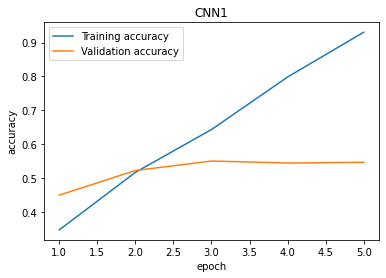

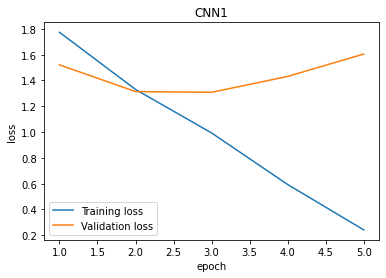

5000/5000 [==============================] - 1s 129us/step
The model (CNN1) accuracy on the test set is: 
0.5479999780654907


In [ ]:
history = model.fit(X_train_reduced, y_train_reduced, validation_data=(X_validate_reduced, y_validate_reduced), batch_size=32, epochs=5)
plot_acc(history, 'CNN1')
_, accuracy = model.evaluate(X_test_reduced, y_test_reduced)
print('The model (CNN1) accuracy on the test set is: ')
print(accuracy)

In [ ]:
# DONT RUN IF NOT ON COLAB
files.download('loss_CNN1.png')
files.download('accuracy_CNN1.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# CNN2

In [ ]:
img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols, 3)

# strucure of the network:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

model.summary()

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_155 (Dense)            (None, 512)               1180160   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)             

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 3s 272us/step - loss: 1.9575 - categorical_accuracy: 0.2732 - val_loss: 1.6882 - val_categorical_accuracy: 0.3816
Epoch 2/5
10000/10000 [==============================] - 2s 247us/step - loss: 1.5622 - categorical_accuracy: 0.4225 - val_loss: 1.4344 - val_categorical_accuracy: 0.4574
Epoch 3/5
10000/10000 [==============================] - 2s 243us/step - loss: 1.4127 - categorical_accuracy: 0.4788 - val_loss: 1.3493 - val_categorical_accuracy: 0.5000
Epoch 4/5
10000/10000 [==============================] - 2s 244us/step - loss: 1.2915 - categorical_accuracy: 0.5279 - val_loss: 1.2809 - val_categorical_accuracy: 0.5388
Epoch 5/5
10000/10000 [==============================] - 2s 243us/step - loss: 1.1815 - categorical_accuracy: 0.5705 - val_loss: 1.2607 - val_categorical_accuracy: 0.5458


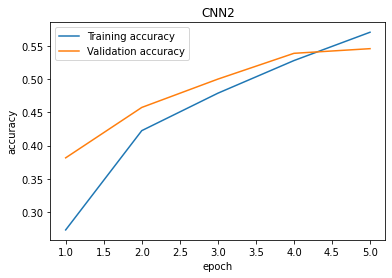

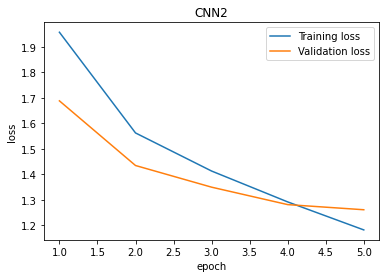

5000/5000 [==============================] - 1s 102us/step
The model (CNN2) accuracy on the test set is: 
0.5465999841690063


In [ ]:
history = model.fit(X_train_reduced, y_train_reduced, validation_data=(X_validate_reduced, y_validate_reduced), batch_size=32, epochs=5)
plot_acc(history, 'CNN2')
_, accuracy = model.evaluate(X_test_reduced, y_test_reduced)
print('The model (CNN2) accuracy on the test set is: ')
print(accuracy)

In [ ]:
# DONT RUN IF NOT ON COLAB
files.download('loss_CNN2.png')
files.download('accuracy_CNN2.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>